In [1]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import torch
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import ants
import pandas as pd

from common.CustomData.MRI_NII_2D import Dataset2D
from common.CustomData.MRI_NII_3D import Dataset3D
from common.data_setup import data_transforms, DOMAINS
from torchvision import transforms

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

c:\Users\doxda\OneDrive\Documentos\Repos\masters-degree-data-shift\.venv\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning:

The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.



# Custom Data

In [6]:
test_data_target_2 = Dataset3D(
    domain=DOMAINS[f"ADNI1-GE-3D"],
    split="test",
    transform=None,
)
test_target_2 = DataLoader(
    dataset=test_data_target_2,  # use custom created test Dataset
    batch_size=1,
    num_workers=2,
    shuffle=False,
    pin_memory=True,
    # generator=g,
)

In [ ]:
for data_3D, target in test_target_2:
    print("DATA")
    print(data_3D.shape)
    print(data_3D[:, :, :, 94, :].shape)
    print(data_3D[:, :, :, 94, :].repeat(1, 3, 1, 1).shape)
    break

DATA
torch.Size([1, 1, 224, 218, 224])
torch.Size([1, 1, 224, 224])
torch.Size([1, 3, 224, 224])


: 

In [3]:
dataset = Dataset2D(
    domain=DOMAINS["ADNI1-GE"],
    split="train",
    transform=data_transforms["val_test"],
)

In [4]:
len(dataset)

14112

In [5]:
# Get class names as a list
class_to_idx = dataset.class_to_idx
class_to_idx

{'AD': 0, 'CN': 1}

In [6]:
# Get class names as a list
class_names = dataset.classes
class_names

['AD', 'CN']

In [7]:
img, label = dataset[10000][0], dataset[10000][1]
print(f"Image shape: {img.shape}")
print(f"Image Type: {type(img)}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image shape: torch.Size([3, 224, 224])
Image Type: <class 'torch.Tensor'>
Image datatype: torch.float32
Image label: 1
Label datatype: <class 'int'>


Original shape: torch.Size([3, 224, 224]) -> [color_channels, height, width]
Image permute shape: torch.Size([224, 224, 3]) -> [height, width, color_channels]


(-0.5, 223.5, 223.5, -0.5)

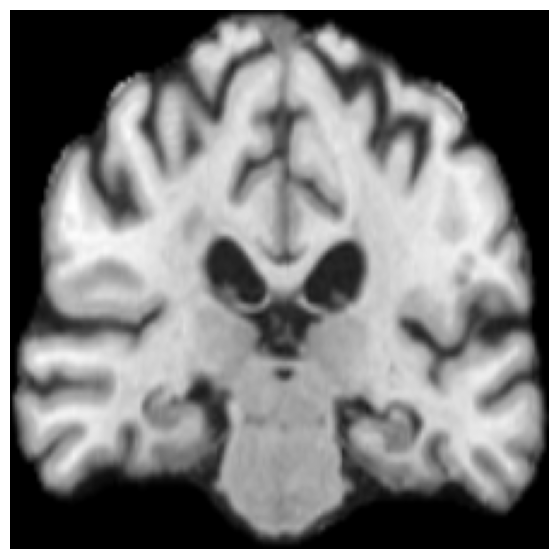

In [13]:
# Rearrange the order of dimensions
# img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(
    f"Image permute shape: {img.permute(1, 2, 0).shape} -> [height, width, color_channels]"
)

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0)[:, :, 0], cmap="gist_gray")
plt.axis("off")
# plt.title(class_names[label], fontsize=14)

Original shape: torch.Size([1, 224, 224]) -> [color_channels, height, width]
Image permute shape: torch.Size([224, 224, 1]) -> [height, width, color_channels]


(-0.5, 223.5, 223.5, -0.5)

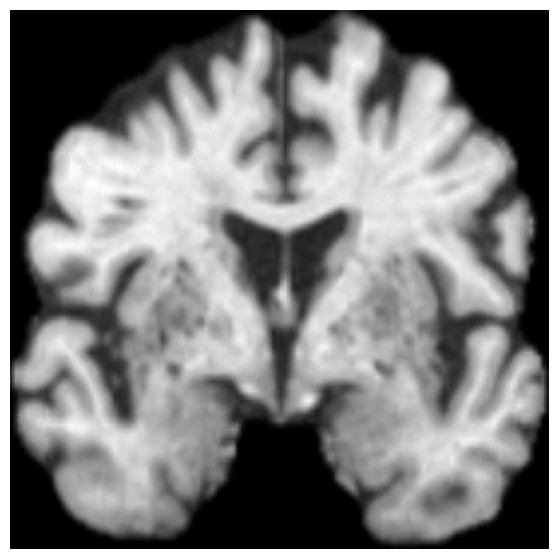

In [7]:
# Rearrange the order of dimensions
# img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(
    f"Image permute shape: {img.permute(1, 2, 0).shape} -> [height, width, color_channels]"
)

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0)[:, :, 0], cmap="gist_gray")
plt.axis("off")
# plt.title(class_names[label], fontsize=14)

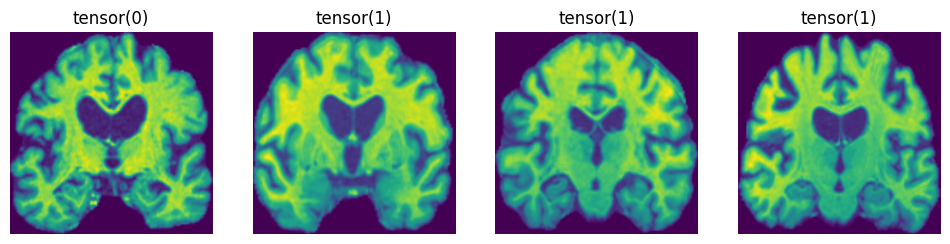

In [8]:
# Display images from the dataset
def show_images(dataloader):
    for images, image_names in dataloader:
        # Convert the tensor images to numpy for displaying
        images = images.numpy()  # Convert to numpy array
        grid = images.transpose(
            (0, 2, 3, 1)
        )  # Convert shape from (batch_size, C, H, W) to (batch_size, H, W, C)

        # Plot images in a grid
        fig, axes = plt.subplots(1, len(image_names), figsize=(12, 4))
        for ax, img, name in zip(axes, grid, image_names):
            ax.imshow(img[:, :, 0])  # Transpose back for correct display
            ax.set_title(name)
            ax.axis("off")
        plt.show()

        break  # To display only one batch of images; remove this line for more batches


# Call the function to display images
dataloader = DataLoader(
    dataset, batch_size=4, shuffle=True
)  # Modify batch size as needed
show_images(dataloader)

# Validando valores em conjuntos de dados

In [ ]:
import os


def contar_arquivos_em_subpastas(caminho):
    for pasta, subpastas, arquivos in os.walk(caminho):
        if len(arquivos) != 0:
            DOMAIN, SLIT, CLASS = rf"{pasta}".split("\\")[-3:]
            print(f"{DOMAIN}/{SLIT}/{CLASS} contém {len(arquivos)} arquivos")


# Exemplo de uso:
caminho = r"C:\Users\doxda\OneDrive\Documentos\Repos\masters-degree-data-shift\data\ADNI1-T1-AD-CN\Image\Preprocess\6_step_nifti_2d"
contar_arquivos_em_subpastas(caminho)

# Imagens

In [ ]:
import ants
from PIL import Image
import matplotlib.pyplot as plt

base_path = r"C:\Users\doxda\OneDrive\Documentos\Repos\masters-degree-data-shift\data\ADNI1-T1-AD-CN\Image\Preprocess\\"
imagem_path = (
    base_path + r"1_step_dicom2nifti\I11102.nii.gz"
)  # Substitua pelo caminho correto da sua imagem
image = ants.image_read(imagem_path, reorient="ASR")
print(image)
ants.plot(image, axis=1, slices=130, figsize=4.0, dpi=600)

In [ ]:
base_path = r"C:\Users\doxda\OneDrive\Documentos\Repos\masters-degree-data-shift\data\ADNI1-T1-AD-CN\Image\Preprocess\\"
imagem_path = (
    base_path + r"3_step_skull_stripping\I11102.nii.gz"
)  # Substitua pelo caminho correto da sua imagem
image = ants.image_read(imagem_path, reorient="ASR")
print(image)
ants.plot(image, axis=1, slices=130, figsize=4.0, dpi=600)

In [ ]:
base_path = r"C:\Users\doxda\OneDrive\Documentos\Repos\masters-degree-data-shift\data\ADNI1-T1-AD-CN\Image\Preprocess\\"
imagem_path = (
    base_path + r"3_step_registration\I11102.nii.gz"
)  # Substitua pelo caminho correto da sua imagem
image = ants.image_read(imagem_path, reorient="ASR")
print(image)
ants.plot(image, axis=1, slices=107, figsize=3.5, dpi=600)